In [1]:
import os

network_path = "networks/input_csv_example"
n_cores = 3
duration = 1.1

snudda_data = "../../../BasalGangliaData/data/"
assert os.path.isdir(snudda_data), f"You need to have BasalGangliaData installed for this example. You can run this example without it, but then do not execute this cell."

In [2]:
from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, snudda_data=snudda_data, random_seed=1337)

# OBS, this is not realistic density of neurons, toy example
cnc.define_striatum(num_dSPN=5, num_iSPN=5, num_FS=5, num_LTS=0, num_ChIN=0,
                    volume_type="cube", side_len=100e-6)
cnc.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
Writing networks/input_csv_example/network-config.json


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/input_csv_example/network-config.json


In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/input_csv_example/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 52/175 (15 neurons)
Processing hyper voxel : 45/175 (15 neurons)
Processing hyper voxel : 87/175 (15 neurons)
Processing hyper voxel : 51/175 (13 neurons)
Processing hyper voxel : 44/175 (11 neurons)
Processing hyper voxel : 80/175 (11 neurons)
Processing hyper voxel : 53/175 (10 neurons)
Processing hyper voxel : 17/175 (9 neurons)
Processing hyper voxel : 86/175 (9 neurons)
Processing hyper voxel : 59/175 (8 neurons)
Processing hyper voxel : 94/175 (7 neurons)
Processing hyper voxel : 46/175 (7 neurons)
Processing hyper voxel : 58/175 (6 neurons)
Processing hyper voxel : 88/175 (4 neurons)
Processing hyper voxel : 24/175 (4 neurons)
Processing hyper voxel : 10/175 (4 neurons)
Processing hyper voxel : 81/175 (4 neurons)
Processing hyper voxel : 79/175 (4 neurons)
Processing hyper voxel : 9/175 (3 neuro

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

Read 3322 out of total 3322 synapses
Read 38 out of total 38 gapJunctions


In [6]:
os.system(f"nrnivmodl {snudda_data}/neurons/mechanisms")

/home/hjorth/HBP/Snudda/examples/notebooks
Mod files: "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/bk_ch.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/bk_fs.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/bk_ms.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/ca_ch.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/cadyn_fs.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/cadyn_ms.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/cal12_ms.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/cal13_ms.mod" "../../../BasalGanglia

0

In [7]:
import os
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path, 
                 input_config_file="input_config/csv-input-example.json",
                 verbose=False)
si.generate()

Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/input_csv_example/network-config.json
Loading 15 neurons with 373 synapses and 13 gap junctions
!!! Warning, combining definition of cortical_background input for neuron iSPN_0 0 (meta modified by input_config)
!!! Warning, combining definition of thalamic_background input for neuron iSPN_0 0 (meta modified by input_config)
Writing spikes to networks/input_csv_example/input-spikes.hdf5


In [8]:
os.system(f"mpiexec -n {n_cores} snudda simulate {network_path}  --time {duration}")

numprocs=3
Using input file networks/input_csv_example/input-spikes.hdf5
Using input file networks/input_csv_example/input-spikes.hdf5
Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/input_csv_example/network-config.json
Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/input_csv_example/network-config.json
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', path='networks/input_csv_example', network_file=None, input_file=None, output_file=None, time=1.1, snudda_data=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=False, disable_gj=False, mech_dir=None, profile=False, verbose=False, exportCoreNeuron=False, record_all=None)
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (

0

In [9]:
print(f"mpiexec -n {n_cores} snudda simulate {network_path}  --time {duration}")

mpiexec -n 3 snudda simulate networks/input_csv_example  --time 1.1


Loading network info from networks/input_csv_example/network-synapses.hdf5
Loading 15 neurons with 373 synapses and 13 gap junctions
Loading input info from networks/input_csv_example/input-spikes.hdf5
Loading networks/input_csv_example/simulation/output.hdf5
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Plotted 15 traces (total 15)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/input_csv_example/figures/Network-voltage-trace--FS-dSPN-iSPN.pdf


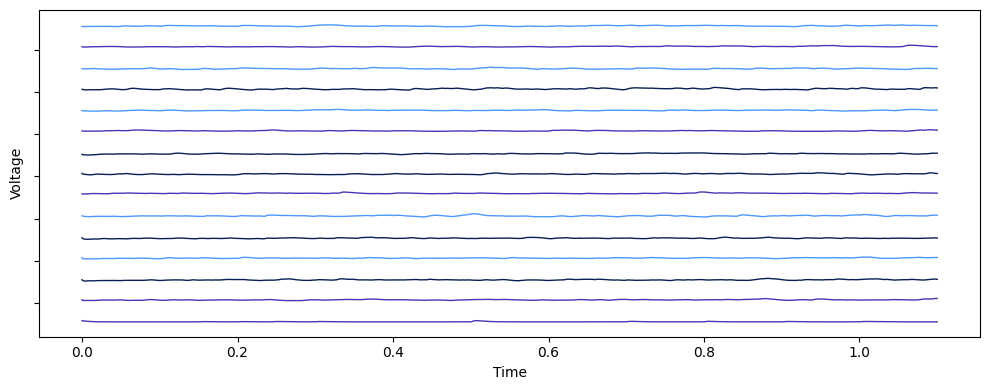

In [10]:
%matplotlib inline

network_file = os.path.join(network_path, "network-synapses.hdf5")
output_file = os.path.join(network_path, "simulation", "output.hdf5")
input_file = os.path.join(network_path, "input-spikes.hdf5")

from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file=output_file, network_file=network_file, input_file=input_file)
# Use trace_id to specify which traces
ax = pt.plot_traces(offset=100e-3,fig_size=(10,4))

Plotting traces: [0]
Plotted 1 traces (total 15)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/input_csv_example/figures/Network-voltage-trace--iSPN-0.pdf


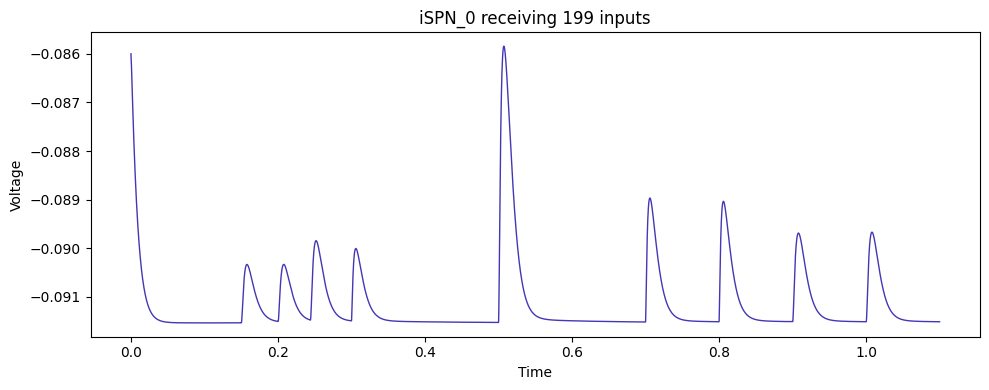

In [11]:
ax = pt.plot_traces(offset=100e-3,fig_size=(10,4), trace_id=0)

Reading SNUDDA_DATA=../../../BasalGangliaData/data/ from networks/input_csv_example/network-config.json
Loading 15 neurons with 373 synapses and 13 gap junctions
Plotting 199 external synapses
Figure written: networks/input_csv_example/figures/input-to-0-iSPN_0-and-internal-synapses.png


<Axes3DSubplot:title={'center':'Input to iSPN_0 (0)'}>

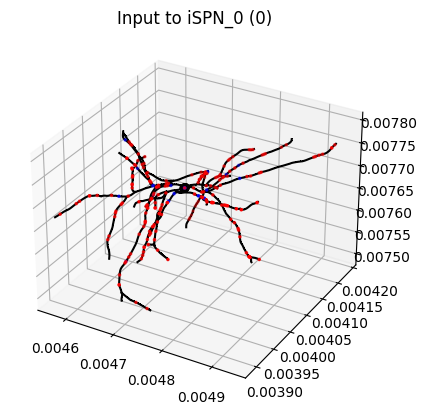

In [13]:
from snudda.plotting.plot_input_locations import SnuddaPlotInputLocations
pil = SnuddaPlotInputLocations(network_path=network_path)
pil.plot_neuron_inputs(neuron_id=0)